In [43]:
import numpy as np
import pandas as pd 
import seaborn as sns
from IPython.display import display
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

In [34]:
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
data = pd.read_csv(csv_path)

#Crea una copia del DataFrame
df=data.copy()

In [9]:
#Restituisce le prime righe del DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Verifica valori mancanti
totale =df.isnull().sum().sort_values(ascending = False)
percentuale = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([totale, percentuale], axis=1, keys=['Totale', 'Percentuale']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Totale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentuale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Filtraggio delle transazioni fraudolente e legittime
fraudolenti = df[df['Class'] == 1]
legittime = df[df['Class'] == 0]

# Calcolo del numero di transazioni fraudolente con importo nullo
conta_zero = fraudolenti[fraudolenti['Amount'] == 0].shape[0]
print(f"Il numero delle transazioni fraudolente con importo nullo (Amount=0) è: {conta_zero}")

# Calcolo del numero di transazioni legittime con importo nullo
conta_zero = legittime[legittime['Amount'] == 0].shape[0]
print(f"Il numero delle transazioni legittime con importo nullo (Amount=0) è: {conta_zero}")


Il numero delle transazioni fraudolente con importo nullo (Amount=0) è: 27
Il numero delle transazioni legittime con importo nullo (Amount=0) è: 1798


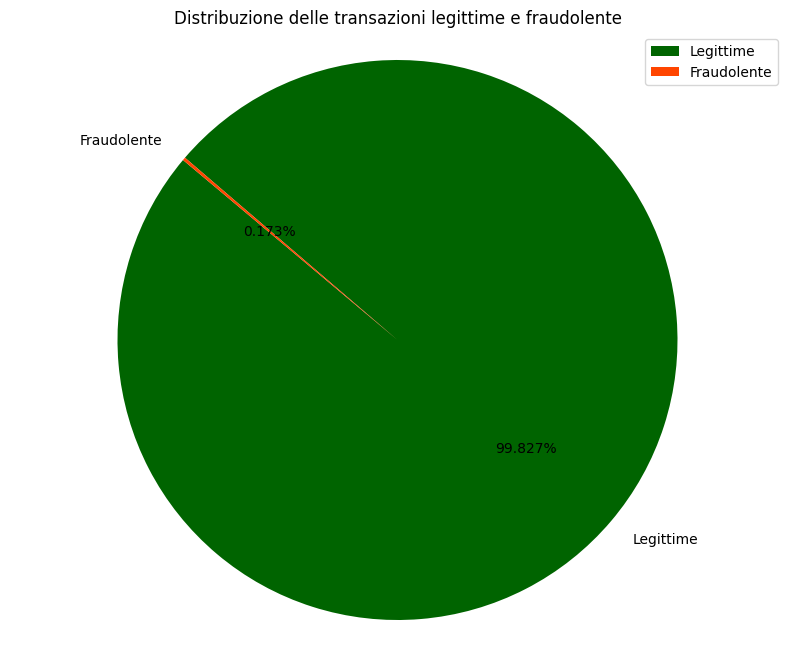

In [7]:
# Calcola il numero di transazioni normali e fraudolente
num_normal = df[df["Class"] == 0].shape[0]
num_fraud = df[df["Class"] == 1].shape[0]

# Etichette per le fette del grafico
labels = ['Legittime', 'Fraudolente']

# Dati da visualizzare nel grafico
sizes = [num_normal, num_fraud]

# Colori delle fette
colors = ['#006400', '#FF4500']

# Crea il grafico a torta con legenda e percentuali con tre cifre decimali
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Distribuzione delle transazioni legittime e fraudolente', loc='center')
plt.legend()
plt.axis('equal')  # Rende il grafico a torta circolare
plt.show()

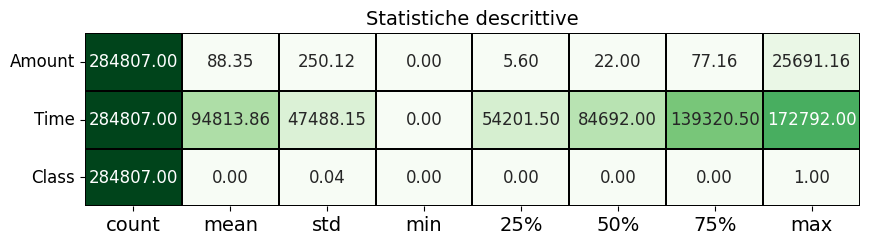

In [8]:
# Statistiche Descrittive del Dataset:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Greens'
def desc_stats(dataframe):
    desc = dataframe.describe().T #restituisce le info del dataframe
    f,ax = plt.subplots(figsize=(10, desc.shape[0] * 0.75))

    #Creazione mappa per una diversa visualizzazione della descrizione DataFrame
    sns.heatmap(desc, annot = True, cmap = cmap1, fmt= '.2f', ax = ax, linecolor = 'black', linewidths = 1.3, cbar = False, annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,rotation = 0)
    plt.title("Statistiche descrittive", size = 14)
    plt.show()
desc_stats(cols)

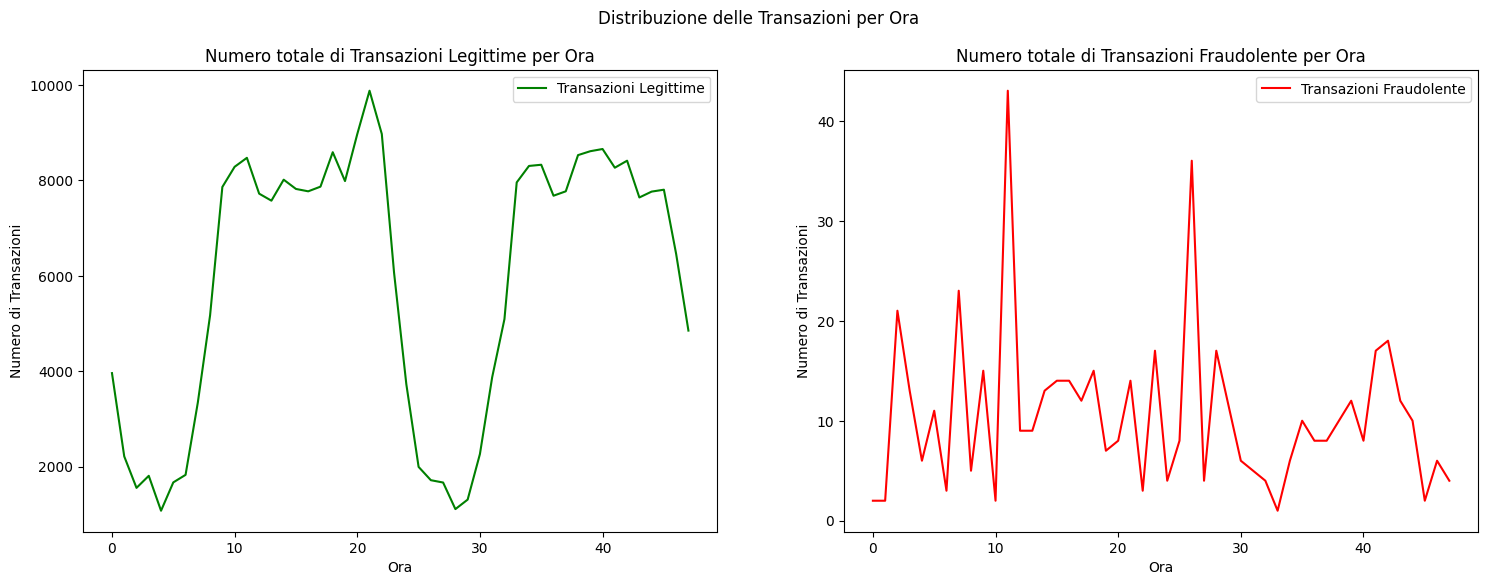

In [9]:
# Aggiunta del campo 'Hour' al DataFrame copiato
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Creazione di un nuovo DataFrame per l'analisi delle caratteristiche delle transazioni per ora
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count']).reset_index()
dfn = pd.DataFrame(tmp)
dfn.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions']

# Creazione dei grafici con legenda
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Creazione dei grafici
s = sns.lineplot(ax=ax1, x="Hour", y="Transactions", data=dfn.loc[dfn.Class == 0], color="green", label="Transazioni Legittime")
s = sns.lineplot(ax=ax2, x="Hour", y="Transactions", data=dfn.loc[dfn.Class == 1], color="red", label="Transazioni Fraudolente")

# Aggiunta delle legende ai grafici
ax1.legend()
ax2.legend()

# Impostazioni degli assi e dei titoli
ax1.set_xlabel("Ora")
ax1.set_ylabel("Numero di Transazioni")
ax1.set_title("Numero totale di Transazioni Legittime per Ora")
ax2.set_xlabel("Ora")
ax2.set_ylabel("Numero di Transazioni")
ax2.set_title("Numero totale di Transazioni Fraudolente per Ora")

# Titolo generale per entrambi i grafici
plt.suptitle("Distribuzione delle Transazioni per Ora")
plt.show()

In [10]:
#Restituisce le prime righe del nuovo dataframe utilizzato per la statistica
dfn.head()

,Hour,Class,Min,Max,Transactions
0,0.0,0,0.0,7712.43,3961
1,0.0,1,0.0,529.00,2
2,1.0,0,0.0,1769.69,2215
3,1.0,1,59.0,239.93,2
4,2.0,0,0.0,4002.88,1555


<Figure size 640x480 with 0 Axes>

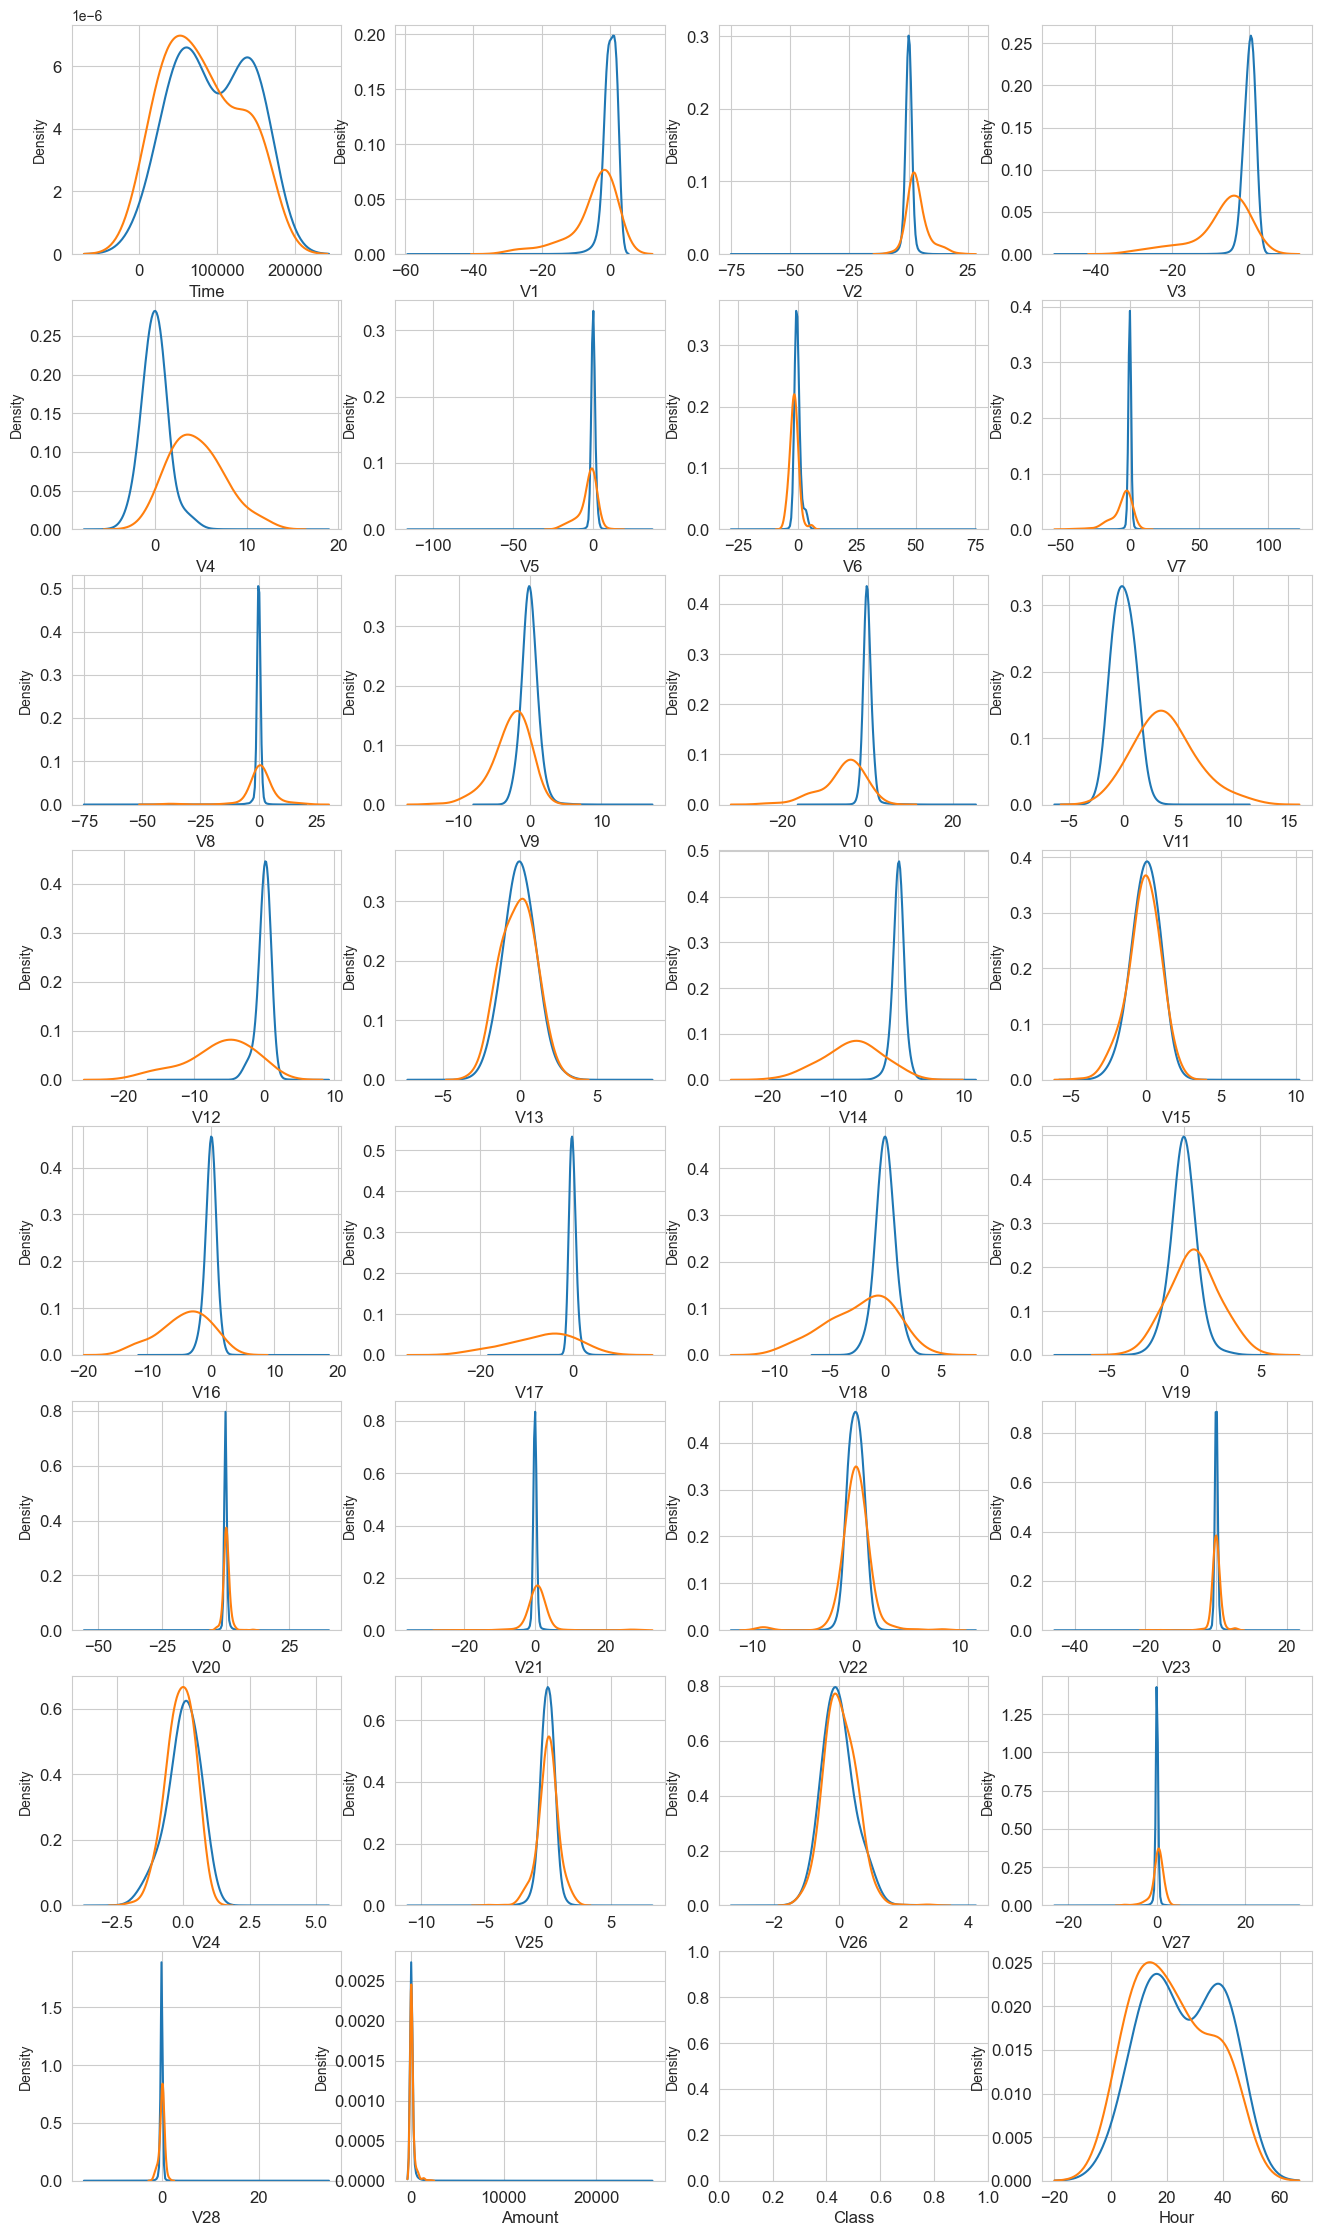

In [54]:
var = df.columns.values

i = 0
tr0 = df.loc[df['Class'] == 0]
tr1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(tr0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(tr1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

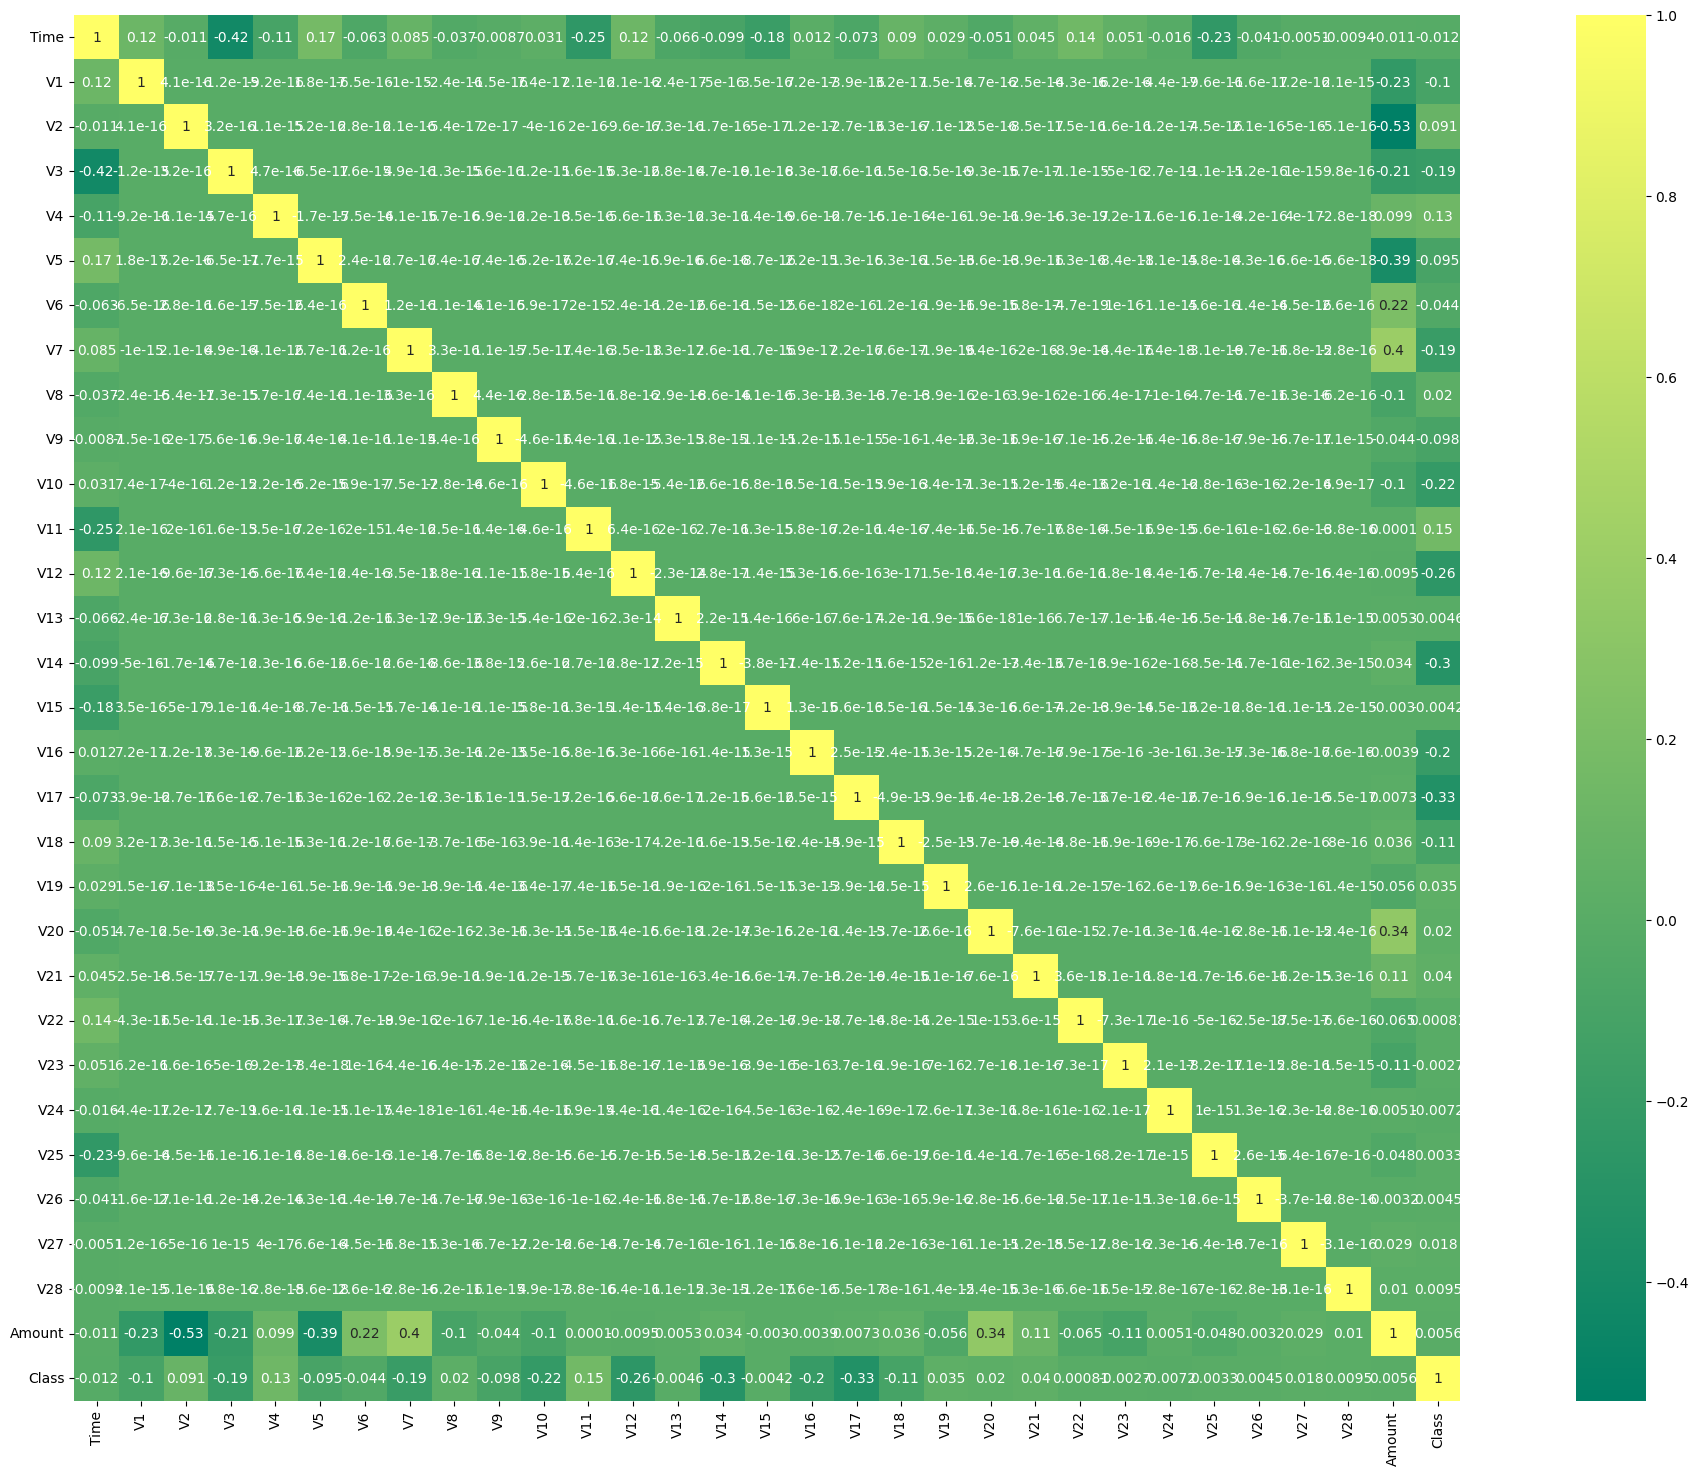

In [35]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),cmap='summer', annot=True, square=True,  )
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler
data=df.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0


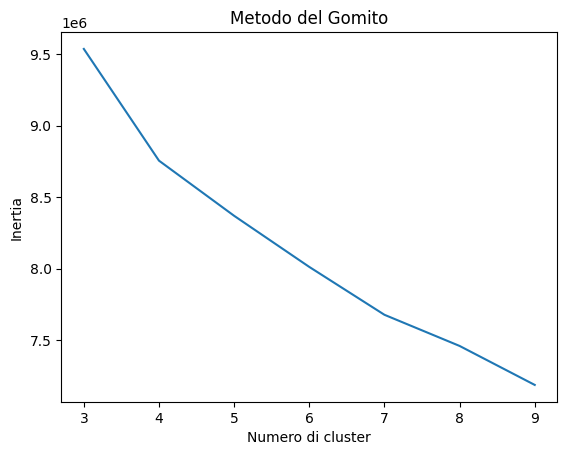

In [25]:
 # Specifica il percorso del file CSV contenente il dataset
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'

# Legge il file CSV e crea il dataframe "dataset"
dataset = pd.read_csv(csv_path)

# Crea una copia del dataframe per lavorarci senza alterare il dataframe originale
data = dataset.copy()

# Inizializza un oggetto RobustScaler per scalare le colonne "Amount" e "Time"
rob_scaler = RobustScaler()

# Scalatura delle colonne "Amount" e "Time" e creazione di nuove colonne scalate
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Rimuove le colonne originali "Time" e "Amount" dal dataframe
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Estrae le colonne scalate "scaled_amount" e "scaled_time" in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuove le colonne scalate "scaled_amount" e "scaled_time" dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisce nuovamente le colonne scalate all'inizio del dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Seleziona le feature per il clustering (ad esempio, distance_from_home, distance_from_last_transaction, etc.)
features = data[['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']]

# Scegli il numero di cluster (K) utilizzando il metodo del gomito
wcss = []  # Inertia (within-cluster sum of squares) per valutare K
for i in range(3, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Traccia il grafico del metodo del gomito per la selezione di K
plt.plot(range(3, 10), wcss)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.show()

# Scegli il valore ottimale di K, ad esempio, K=3 (dall'analisi del grafico)
optimal_k = 4

# Esegui K-Means con il numero ottimale di cluster
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(features)

# Aggiungi le etichette dei cluster al tuo dataset originale
data["cluster_labels"] = kmeans.labels_


In [26]:
fraudolente = data[data['Class'] == 1]
fraudolente.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,cluster_labels
541,-0.307413,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0
623,7.084469,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,3
4920,3.045204,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0
6108,0.517013,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,1


Class                0    1  Legit Ratio  Fraud Ratio
cluster_labels                                       
0               144213  328     0.507230     0.666667
1               128219  120     0.450975     0.243902
2                  628    1     0.002209     0.002033
3                11255   43     0.039586     0.087398


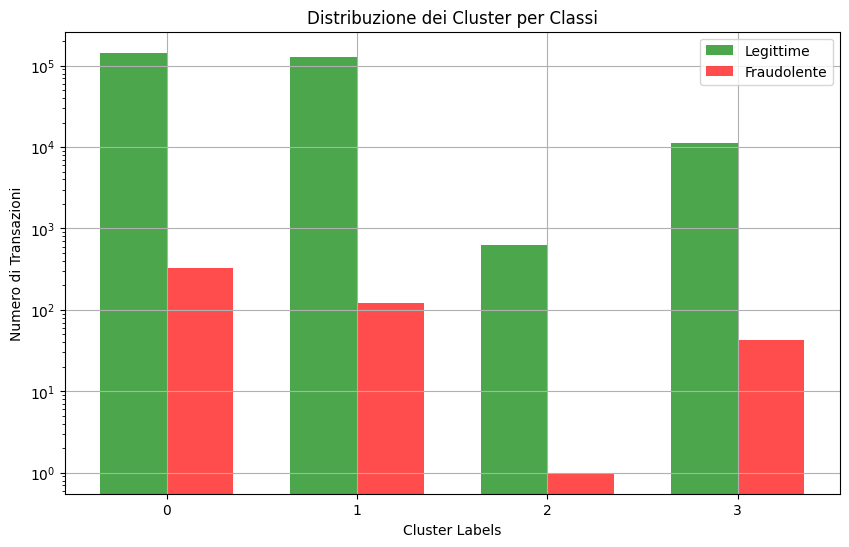

In [30]:
# Conta il numero di transazioni per ciascuna classe di cluster
cluster_counts = data.groupby(['cluster_labels', 'Class']).size().unstack(fill_value=0)

num_class_0 = cluster_counts[0].sum()
num_class_1 = cluster_counts[1].sum()

# Calcola il totale delle transazioni per ciascuna classe di cluster
cluster_totals = cluster_counts.sum(axis=1)

# Calcola i rapporti per ogni classe
fraud_ratio = cluster_counts[1] / num_class_1
legit_ratio = cluster_counts[0] / num_class_0 

# Aggiungi i rapporti come colonne alla tabella cluster_counts
cluster_counts['Legit Ratio'] = legit_ratio
cluster_counts['Fraud Ratio'] = fraud_ratio

# Stampa la tabella con i rapporti
print(cluster_counts)

# Estrai le informazioni per il grafico
cluster_labels = cluster_counts.index
legittime_counts = cluster_counts[0].values
fraudolente_counts = cluster_counts[1].values

# Larghezza delle barre
bar_width = 0.35

# Posizione delle barre sull'asse x
x = np.arange(len(cluster_labels))

# Crea il grafico a barre con due diverse scale sull'asse y
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, legittime_counts, bar_width, label='Legittime', color='green', alpha=0.7)
plt.bar(x + bar_width/2, fraudolente_counts, bar_width, label='Fraudolente', color='red', alpha=0.7)

# Imposta una scala diversa per l'asse y per le transazioni fraudolente
plt.yscale('log')

plt.xlabel('Cluster Labels')
plt.ylabel('Numero di Transazioni')
plt.title('Distribuzione dei Cluster per Classi')
plt.xticks(x, cluster_labels)
plt.legend()
plt.grid(True)
plt.show()

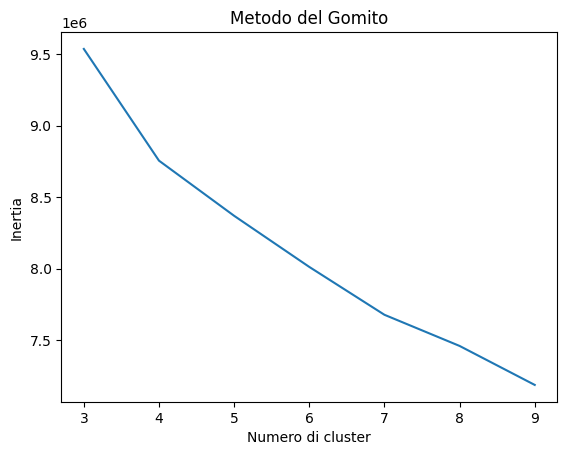

In [31]:
 # Specifica il percorso del file CSV contenente il dataset
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'

# Legge il file CSV e crea il dataframe "dataset"
dataset = pd.read_csv(csv_path)

# Crea una copia del dataframe per lavorarci senza alterare il dataframe originale
data = dataset.copy()

# Inizializza un oggetto RobustScaler per scalare le colonne "Amount" e "Time"
rob_scaler = RobustScaler()

# Scalatura delle colonne "Amount" e "Time" e creazione di nuove colonne scalate
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Rimuove le colonne originali "Time" e "Amount" dal dataframe
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Estrae le colonne scalate "scaled_amount" e "scaled_time" in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuove le colonne scalate "scaled_amount" e "scaled_time" dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisce nuovamente le colonne scalate all'inizio del dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Seleziona le feature per il clustering (ad esempio, distance_from_home, distance_from_last_transaction, etc.)
features = data[['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']]

# Scegli il numero di cluster (K) utilizzando il metodo del gomito
wcss = []  # Inertia (within-cluster sum of squares) per valutare K
for i in range(3, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Traccia il grafico del metodo del gomito per la selezione di K
plt.plot(range(3, 10), wcss)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.show()

# Scegli il valore ottimale di K
optimal_k = 7

# Esegui K-Means con il numero ottimale di cluster
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(features)

# Aggiungi le etichette dei cluster al tuo dataset originale
data["cluster_labels"] = kmeans.labels_

Class                0    1  Legit Ratio  Fraud Ratio
cluster_labels                                       
0                16440    0     0.057823     0.000000
1                 5600  198     0.019696     0.402439
2               125252  119     0.440540     0.241870
3                 3030   10     0.010657     0.020325
4               116019  113     0.408065     0.229675
5                17678   52     0.062178     0.105691
6                  296    0     0.001041     0.000000


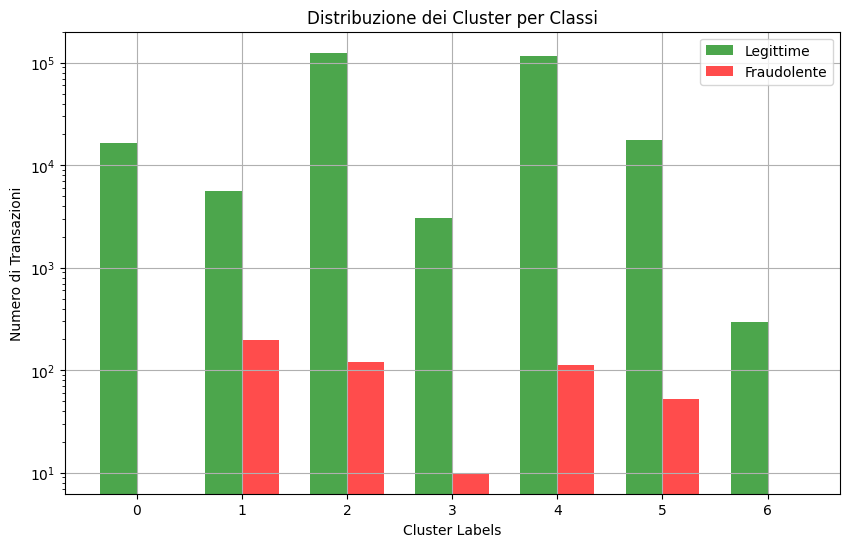

In [32]:
# Conta il numero di transazioni per ciascuna classe di cluster
cluster_counts = data.groupby(['cluster_labels', 'Class']).size().unstack(fill_value=0)

num_class_0 = cluster_counts[0].sum()
num_class_1 = cluster_counts[1].sum()

# Calcola il totale delle transazioni per ciascuna classe di cluster
cluster_totals = cluster_counts.sum(axis=1)

# Calcola i rapporti per ogni classe
fraud_ratio = cluster_counts[1] / num_class_1
legit_ratio = cluster_counts[0] / num_class_0 

# Aggiungi i rapporti come colonne alla tabella cluster_counts
cluster_counts['Legit Ratio'] = legit_ratio
cluster_counts['Fraud Ratio'] = fraud_ratio

# counts conterrà il numero di transazioni per ciascuna classe di cluster_labels (da 0 a 3)
# e per ciascuna classe di Class (0 o 1)
print(cluster_counts)

# Estrai le informazioni per il grafico
cluster_labels = cluster_counts.index
legittime_counts = cluster_counts[0].values
fraudolente_counts = cluster_counts[1].values

# Larghezza delle barre
bar_width = 0.35

# Posizione delle barre sull'asse x
x = np.arange(len(cluster_labels))

# Crea il grafico a barre con due diverse scale sull'asse y
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, legittime_counts, bar_width, label='Legittime', color='green', alpha=0.7)
plt.bar(x + bar_width/2, fraudolente_counts, bar_width, label='Fraudolente', color='red', alpha=0.7)

# Imposta una scala diversa per l'asse y per le transazioni fraudolente
plt.yscale('log')

plt.xlabel('Cluster Labels')
plt.ylabel('Numero di Transazioni')
plt.title('Distribuzione dei Cluster per Classi')
plt.xticks(x, cluster_labels)
plt.legend()
plt.grid(True)
plt.show()

KNeighborsClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.948052
1,Recall,0.744898
2,F1 Score,0.834286
3,Accuratezza Test,0.999491
4,Accuratezza Train,0.999561


DecisionTreeClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.710280
1,Recall,0.775510
2,F1 Score,0.741463
3,Accuratezza Test,0.999070
4,Accuratezza Train,1.000000


RandomForestClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.974359
1,Recall,0.775510
2,F1 Score,0.863636
3,Accuratezza Test,0.999579
4,Accuratezza Train,1.000000


GradientBoostingClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.737500
1,Recall,0.602041
2,F1 Score,0.662921
3,Accuratezza Test,0.998947
4,Accuratezza Train,0.999184


AdaBoostClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.855422
1,Recall,0.724490
2,F1 Score,0.784530
3,Accuratezza Test,0.999315
4,Accuratezza Train,0.999307


LogisticRegression Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.863636
1,Recall,0.581633
2,F1 Score,0.695122
3,Accuratezza Test,0.999122
4,Accuratezza Train,0.999232


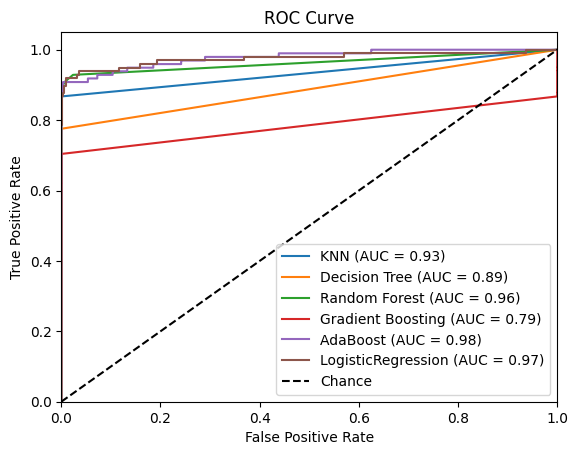

In [58]:
#Dataset completo 

# Specifica il percorso del file CSV contenente il dataset
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'

# Legge il file CSV e crea il dataframe "dataset"
dataset = pd.read_csv(csv_path)

# Crea una copia del dataframe per lavorarci senza alterare il dataframe originale
data = dataset.copy()

# Inizializza un oggetto RobustScaler per scalare le colonne "Amount" e "Time"
rob_scaler = RobustScaler()

# Scalatura delle colonne "Amount" e "Time" e creazione di nuove colonne scalate
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Rimuove le colonne originali "Time" e "Amount" dal dataframe
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Estrae le colonne scalate "scaled_amount" e "scaled_time" in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuove le colonne scalate "scaled_amount" e "scaled_time" dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisce nuovamente le colonne scalate all'inizio del dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrae le features (variabili indipendenti) dal dataframe escludendo la colonna "Class"
X = data.drop(["Class"], axis=1).values
# Estrae le etichette di classe dalla colonna "Class" del dataframe
y = data["Class"].values

# Divide i dati in set di addestramento e di test usando train_test_split
Original_X_train, Original_X_test, Original_y_train, Original_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza i modelli di classificazione e memorizza i nomi dei modelli
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lgm = LogisticRegression()
models = [knn, dtc, rfc, gbc, abc, lgm]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'LogisticRegression']

# Itera su ciascun modello per addestrarlo e valutarlo
for i, model in enumerate(models):
    # Addestra il modello sul set di addestramento
    model.fit(Original_X_train, Original_y_train)
    
    # Effettua previsioni sul set di test
    Original_y_pred = model.predict(Original_X_test)
    
    # Stampa il report di classificazione per valutare le prestazioni del modello
    print(type(model).__name__, "Classification_report:\n", classification_report(Original_y_test, Original_y_pred))
    
    # Calcola le previsioni delle probabilità per la curva ROC
    y_pred_prob = model.predict_proba(Original_X_test)[:, 1]
    
    # Calcola i valori per la curva ROC
    fpr, tpr, _ = roc_curve(Original_y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcola le metriche desiderate
    y_pred_train = model.predict(Original_X_train)
    precision = precision_score(Original_y_test, Original_y_pred)
    recall = recall_score(Original_y_test, Original_y_pred)
    f1 = f1_score(Original_y_test, Original_y_pred)
    accuracy = accuracy_score(Original_y_test, Original_y_pred)
    accuracy_train = accuracy_score(Original_y_train, y_pred_train)
    
    # Crea e visualizza una tabella delle metriche con gradienti di colore
    metrics_table = pd.DataFrame({ 'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza Test', 'Accuratezza Train'],
        'Valore': [precision, recall, f1, accuracy, accuracy_train]
    })

    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    display(metrics_table_styled)

    # Disegna la curva ROC per il modello corrente
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico ROC
plt.show()

KNeighborsClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       110
           1       0.97      0.84      0.90        87

    accuracy                           0.92       197
   macro avg       0.93      0.91      0.92       197
weighted avg       0.92      0.92      0.92       197



,Metrica,Valore
0,Precision,0.973333
1,Recall,0.839080
2,F1 Score,0.901235
3,Accuratezza Test,0.918782
4,Accuratezza Train,0.952986


DecisionTreeClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.92      0.89      0.90        87

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



,Metrica,Valore
0,Precision,0.916667
1,Recall,0.885057
2,F1 Score,0.900585
3,Accuratezza Test,0.913706
4,Accuratezza Train,1.000000


RandomForestClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.99      0.85      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



,Metrica,Valore
0,Precision,0.986667
1,Recall,0.850575
2,F1 Score,0.913580
3,Accuratezza Test,0.928934
4,Accuratezza Train,1.000000


GradientBoostingClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.99      0.85      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



,Metrica,Valore
0,Precision,0.986667
1,Recall,0.850575
2,F1 Score,0.913580
3,Accuratezza Test,0.928934
4,Accuratezza Train,1.000000


AdaBoostClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       110
           1       0.96      0.85      0.90        87

    accuracy                           0.92       197
   macro avg       0.93      0.91      0.92       197
weighted avg       0.92      0.92      0.92       197



,Metrica,Valore
0,Precision,0.961039
1,Recall,0.850575
2,F1 Score,0.902439
3,Accuratezza Test,0.918782
4,Accuratezza Train,0.992376


LogisticRegression Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       110
           1       0.97      0.85      0.91        87

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



,Metrica,Valore
0,Precision,0.973684
1,Recall,0.850575
2,F1 Score,0.907975
3,Accuratezza Test,0.923858
4,Accuratezza Train,0.958069


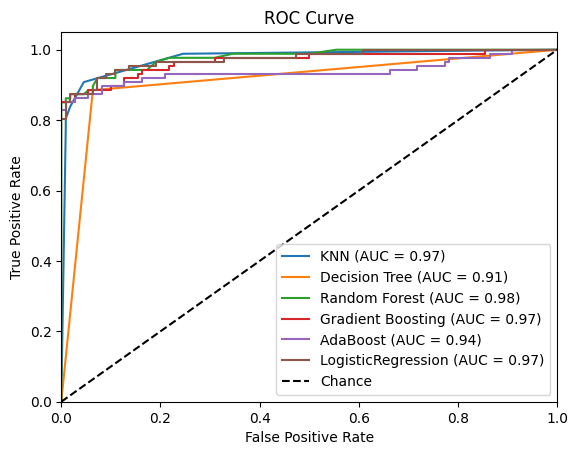

In [35]:
#Subsample del dataset

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Divide le transazioni in legittime e fraudolente
legitimate_transactions = data[data['Class'] == 0]
fraudulent_transactions = data[data['Class'] == 1]

# Sottocampiona il numero di transazioni legittime per farlo corrispondere al numero di transazioni fraudolente
legitimate_subsample = resample(legitimate_transactions, replace=False, n_samples=len(fraudulent_transactions), random_state=42)

# Combina le transazioni legittime sottocampionate con quelle fraudolente
balanced_subsample = pd.concat([legitimate_subsample, fraudulent_transactions])

# Mischia il sottocampionamento 
balanced_subsample = balanced_subsample.sample(frac=1, random_state=42)

# Divide le features (X) dalla variabile target (y)
X = balanced_subsample.drop('Class', axis=1)  # Features
y = balanced_subsample['Class']  # Target

# Divide i dati in set di addestramento e di test usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converte il DataFrame delle feature del set di test e addestramento in un array 
X_test_array = X_test.values 
X_train_array = X_train.values

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lgm = LogisticRegression()
models = [knn, dtc, rfc, gbc, abc, lgm]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'LogisticRegression']

for i, model in enumerate(models):
    model.fit(X_train_array, y_train)

    # Effettua previsioni sul set di test
    y_pred = model.predict(X_test_array)

    # Stampa il report di classificazione per valutare le prestazioni del modello
    print(type(model).__name__, "Classification_report:\n", classification_report(y_test, y_pred))

    # Calcola le previsioni delle probabilità per la curva ROC
    y_pred_prob = model.predict_proba(X_test_array)[:,1]

    # Calcola i valori per la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcola le metriche desiderate
    y_pred_train = model.predict(X_train_array )
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    
    # Crea e visualizza una tabella delle metriche con gradienti di colore
    metrics_table = pd.DataFrame({ 'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza Test', 'Accuratezza Train'],
        'Valore': [precision, recall, f1, accuracy, accuracy_train]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)
    
    # Disegno della curva ROC per ogni modello
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()

KNN - Cross-Validation AUC: 0.93


,Metrica,Valore
0,Precision,0.935206
1,Recall,0.774418
2,F1 Score,0.846857
3,Accuratezza,0.999515


Decision Tree - Cross-Validation AUC: 0.89


,Metrica,Valore
0,Precision,0.742686
1,Recall,0.778479
2,F1 Score,0.759562
3,Accuratezza,0.999147


Random Forest - Cross-Validation AUC: 0.95


,Metrica,Valore
0,Precision,0.950816
1,Recall,0.780519
2,F1 Score,0.857196
3,Accuratezza,0.999551


Gradient Boosting - Cross-Validation AUC: 0.76


,Metrica,Valore
0,Precision,0.768840
1,Recall,0.603422
2,F1 Score,0.661460
3,Accuratezza,0.999024


AdaBoost - Cross-Validation AUC: 0.96


,Metrica,Valore
0,Precision,0.808880
1,Recall,0.687013
2,F1 Score,0.742101
3,Accuratezza,0.999175


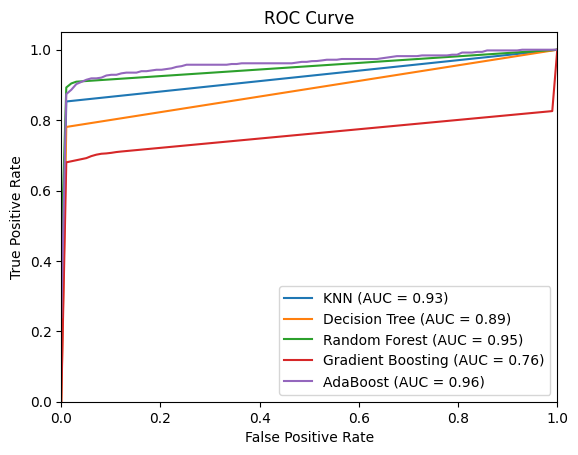

In [6]:
#5 fold Cross Validation

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrae le features (variabili indipendenti) dal dataframe escludendo la colonna "Class"
X = data.drop(["Class"], axis=1).values
# Estrae le etichette di classe dalla colonna "Class" del dataframe
y = data["Class"].values

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

models = [knn, dtc, rfc, gbc, abc]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

# Definisci il numero di fold per la cross-validation
n_splits = 5
# Crea un oggetto StratifiedKFold per la cross-validation
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inizializza array per memorizzare i tassi di vero positivo (tpr) per ogni valore di fpr
mean_fpr = np.linspace(0, 1, 100)

# Inizializza liste per memorizzare le curve ROC per ciascun modello
tprs = []
aucs = []

# Inizializza le liste per memorizzare le metriche per ciascun modello
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Itera su ciascun modello
for i, model in enumerate(models):
    # Inizializza le liste per memorizzare i tassi di vero positivo (tpr) per ogni fold
    fold_tprs = []
    
    # Inizializza la variabile per memorizzare l'area sotto la curva ROC (AUC) per ogni fold
    fold_aucs = []

    # Inizializza liste per memorizzare le metriche per ciascun fold della cross-validation
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_accuracies = []
    
    # Itera su ciascun fold della cross-validation
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Resto del tuo codice per addestrare e valutare il modello

        # Addestra il modello sul set di addestramento del fold corrente
        model.fit(X_train, y_train)
        
        # Effettua previsioni sul set di test del fold corrente
        y_pred_prob = model.predict_proba(X_test)[:, 1]

        # Effettua previsioni sul set di test
        y_pred = model.predict(X_test)
        
        # Calcola la curva ROC per il fold corrente
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        
        # Calcola l'area sotto la curva ROC (AUC) per il fold corrente
        roc_auc = auc(fpr, tpr)
        
        # Aggiungi il tpr e l'AUC del fold corrente alle rispettive liste
        fold_tprs.append(np.interp(mean_fpr, fpr, tpr))
        fold_aucs.append(roc_auc)

        # Calcola le metriche per il fold corrente
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Aggiungi le metriche del fold corrente alle rispettive liste
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1s.append(f1)
        fold_accuracies.append(accuracy)
    
    # Calcola la media dei tpr per tutti i fold
    mean_tpr = np.mean(fold_tprs, axis=0)
    
    # Calcola la media delle AUC per tutti i fold
    mean_auc = np.mean(fold_aucs)

    # Calcola la media delle metriche per tutti i fold
    mean_precision = np.mean(fold_precisions)
    mean_recall = np.mean(fold_recalls)
    mean_f1 = np.mean(fold_f1s)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Aggiungi il tpr e l'AUC medi alle rispettive liste
    tprs.append(mean_tpr)
    aucs.append(mean_auc)

    # Aggiungi le medie delle metriche alle rispettive liste
    precision_scores.append(mean_precision)
    recall_scores.append(mean_recall)
    f1_scores.append(mean_f1)
    accuracy_scores.append(mean_accuracy)
    
    # Stampa l'AUC media della cross-validation per il modello corrente
    print(f'{model_names[i]} - Cross-Validation AUC: {mean_auc:.2f}')

    # Disegna la curva ROC per il modello corrente
    plt.plot(mean_fpr, mean_tpr, label=f'{model_names[i]} (AUC = {mean_auc:.2f})')
    
    # Crea una piccola tabella colorata con le metriche
    metrics_table = pd.DataFrame({
        'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza'],
        'Valore': [mean_precision, mean_recall, mean_f1, mean_accuracy]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()

In [57]:
#GridSearch su tutto il dataset

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrae le features (variabili indipendenti) dal dataframe escludendo la colonna "Class"
X = data.drop(["Class"], axis=1).values
# Estrae le etichette di classe dalla colonna "Class" del dataframe
y = data["Class"].values

param_grid_knn = {'n_neighbors': [3, 5, 7, 9],  # Numero di vicini
                'weights': ['uniform', 'distance'],  # Metodo di pesatura
                'metric': ['euclidean', 'manhattan']  # Metrica di distanza
}

param_grid_dtc = {'max_depth': [2, 5, 10],
                'min_samples_split': [2, 5, 10]}

param_grid_rfc = {'n_estimators': [50, 150, 300],  # Numero di alberi nella foresta
            'max_depth': [None, 5, 10, 20, 30],  # Massima profondità degli alberi
            'min_samples_split': [2, 5, 10],  # Numero minimo di campioni richiesti per suddividere un nodo interno
            'min_samples_leaf': [1, 2, 4, 10],  # Numero minimo di campioni richiesti per essere in una foglia
            'max_features': ['sqrt', 'log2'],  # Numero massimo di feature da considerare per la migliore divisione
}

param_grid_gbc = {
    'n_estimators': [100, 200],  # Numero di stimatori
    'learning_rate': [0.1, 0.2],  # Tasso di apprendimento
    'max_depth': [3, 5],  # Massima profondità degli stimatori
}

param_grid_abc = {
    'n_estimators': [50, 100, 200],  # Numero di stimatori (alberi) nell'ensemble
    'learning_rate': [0.1, 0.5, 1.0],  # Tasso di apprendimento
    'algorithm': ['SAMME', 'SAMME.R'],
}

param_grid_lgm = {'C': [0.01, 0.1, 1, 10, 100],  # Valori di C da esplorare
                'penalty': ['l1', 'l2'],  # Tipi di regolarizzazione da esplorare
                'solver': ['lbfgs','saga']}  # Algoritmo di ottimizzazione (adatto a regolarizzazione L1) 

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lgm = LogisticRegression()

grid_search = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search.fit(X_train, y_train)
print(f'{"KNeighborsClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(dtc, param_grid_dtc, cv=5)
grid_search.fit(X_train, y_train)
print(f'{"DecisionTreeClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(rfc, param_grid_rfc, cv=5)
grid_search.fit(X_train, y_train)
print(f'{"RandomForestClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(gbc, param_grid_gbc, cv=5)
grid_search.fit(X_train, y_train)
print(f'{"GradientBoostingClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(abc, param_grid_abc, cv=5)
grid_search.fit(X_train, y_train)
print(f'{"AdaBoostClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(lgm, param_grid_lgm, cv=5)
grid_search.fit(X_train, y_train)
print(f'{"LogisticRegression"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)


KNeighborsClassifier
Migliori iperparametri: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Miglior score: 0.940272514714182
DecisionTreeClassifier
Migliori iperparametri: {'max_depth': 5, 'min_samples_split': 5}
Miglior score: 0.9224945577682819
RandomForestClassifier
Migliori iperparametri: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Miglior score: 0.9491493993388695
GradientBoostingClassifier
Migliori iperparametri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Miglior score: 0.9402644521486737
AdaBoostClassifier
Migliori iperparametri: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}
Miglior score: 0.9478755139885513
LogisticRegression
Migliori iperparametri: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Miglior score: 0.9440457953720873


In [32]:
#GridSearch Subsample del dataset

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Divide le transazioni in legittime e fraudolente
legitimate_transactions = data[data['Class'] == 0]
fraudulent_transactions = data[data['Class'] == 1]

# Sottocampiona il numero di transazioni legittime per farlo corrispondere al numero di transazioni fraudolente
legitimate_subsample = resample(legitimate_transactions, replace=False, n_samples=len(fraudulent_transactions), random_state=42)

# Combina le transazioni legittime sottocampionate con quelle fraudolente
balanced_subsample = pd.concat([legitimate_subsample, fraudulent_transactions])

# Mischia il sottocampionamento 
balanced_subsample = balanced_subsample.sample(frac=1, random_state=42)

# Divide le features (X) dalla variabile target (y)
X = balanced_subsample.drop('Class', axis=1)  # Features
y = balanced_subsample['Class']  # Target

# Divide i dati in set di addestramento e di test usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converte il DataFrame delle feature del set di test e addestramento in un array 
X_test_array = X_test.values 
X_train_array = X_train.values

param_grid_knn = {'n_neighbors': [3, 5, 7, 9],  # Numero di vicini
                'weights': ['uniform', 'distance'],  # Metodo di pesatura
                'metric': ['euclidean', 'manhattan']  # Metrica di distanza
}

param_grid_dtc = {'max_depth': [2, 3, 4, 5, 10, 20],
                'min_samples_split': [2, 3, 4, 5, 10, 20]}

param_grid_rfc = {'n_estimators': [50, 100, 200, 300],  # Numero di alberi nella foresta
            'max_depth': [None, 5, 10, 20, 30],  # Massima profondità degli alberi
            'min_samples_split': [2, 5, 10],  # Numero minimo di campioni richiesti per suddividere un nodo interno
            'min_samples_leaf': [1, 2, 4, 10],  # Numero minimo di campioni richiesti per essere in una foglia
            'max_features': ['auto', 'sqrt', 'log2'],  # Numero massimo di feature da considerare per la migliore divisione
}

param_grid_gbc = {
    'n_estimators': [100, 200, 300],  # Numero di stimatori
    'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
    'max_depth': [3, 4, 5],  # Massima profondità degli stimatori
}

param_grid_abc = {
    'n_estimators': [50, 100, 200],  # Numero di stimatori (alberi) nell'ensemble
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Tasso di apprendimento
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'algorithm': ['SAMME', 'SAMME.R'],
}

param_grid_lgm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valori di C da esplorare
                'penalty': ['l1', 'l2'],  # Tipi di regolarizzazione da esplorare
                'solver': ['lbfgs','saga']}  # Algoritmo di ottimizzazione (adatto a regolarizzazione L1) 

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lgm = LogisticRegression()

grid_search = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search.fit(X_train_array, y_train)
print(f'{"KNeighborsClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(dtc, param_grid_dtc, cv=5)
grid_search.fit(X_train_array, y_train)
print(f'{"DecisionTreeClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(rfc, param_grid_rfc, cv=5)
grid_search.fit(X_train_array, y_train)
print(f'{"RandomForestClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(gbc, param_grid_gbc, cv=5)
grid_search.fit(X_train_array, y_train)
print(f'{"GradientBoostingClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(abc, param_grid_abc, cv=5)
grid_search.fit(X_train_array, y_train)
print(f'{"AdaBoostClassifier"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

grid_search = GridSearchCV(lgm, param_grid_lgm, cv=5)
grid_search.fit(X_train_array, y_train)
print(f'{"LogisticRegression"}')
print("Migliori iperparametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)


KNeighborsClassifier
Migliori iperparametri: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Miglior score: 0.940272514714182
DecisionTreeClassifier
Migliori iperparametri: {'max_depth': 3, 'min_samples_split': 2}
Miglior score: 0.9275900991695558
RandomForestClassifier
Migliori iperparametri: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Miglior score: 0.9491493993388695
GradientBoostingClassifier
Migliori iperparametri: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Miglior score: 0.9415383374989921
AdaBoostClassifier
Migliori iperparametri: {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.5, 'n_estimators': 200}
Miglior score: 0.9478755139885513
LogisticRegression
Migliori iperparametri: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Miglior score: 0.9440457953720873


KNeighborsClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       110
           1       0.95      0.85      0.90        87

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



,Metrica,Valore
0,Precision,0.948718
1,Recall,0.850575
2,F1 Score,0.896970
3,Accuratezza Test,0.913706
4,Accuratezza Train,0.964422


DecisionTreeClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.85      0.92        87

    accuracy                           0.93       197
   macro avg       0.95      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



,Metrica,Valore
0,Precision,1.000000
1,Recall,0.850575
2,F1 Score,0.919255
3,Accuratezza Test,0.934010
4,Accuratezza Train,0.944091


RandomForestClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.84      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.94      0.93      0.93       197



,Metrica,Valore
0,Precision,1.000000
1,Recall,0.839080
2,F1 Score,0.912500
3,Accuratezza Test,0.928934
4,Accuratezza Train,0.989835


GradientBoostingClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       110
           1       0.97      0.86      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



,Metrica,Valore
0,Precision,0.974026
1,Recall,0.862069
2,F1 Score,0.914634
3,Accuratezza Test,0.928934
4,Accuratezza Train,1.000000


AdaBoostClassifier Classification_report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       110
           1       0.96      0.87      0.92        87

    accuracy                           0.93       197
   macro avg       0.93      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



,Metrica,Valore
0,Precision,0.962025
1,Recall,0.873563
2,F1 Score,0.915663
3,Accuratezza Test,0.928934
4,Accuratezza Train,1.000000


LogisticRegression Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       110
           1       0.97      0.86      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



,Metrica,Valore
0,Precision,0.974026
1,Recall,0.862069
2,F1 Score,0.914634
3,Accuratezza Test,0.928934
4,Accuratezza Train,0.960610


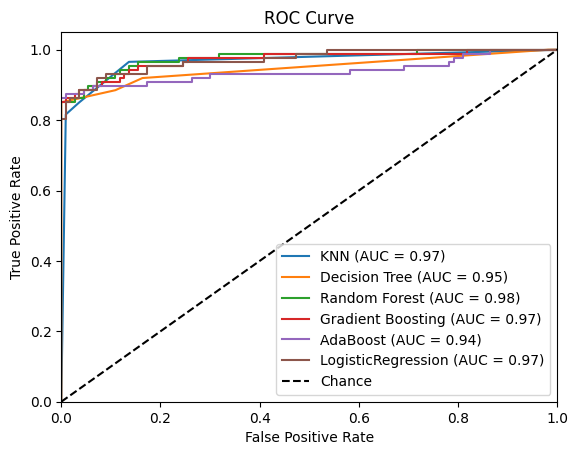

In [5]:
#Subsample del dataset

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Divide le transazioni in legittime e fraudolente
legitimate_transactions = data[data['Class'] == 0]
fraudulent_transactions = data[data['Class'] == 1]

# Sottocampiona il numero di transazioni legittime per farlo corrispondere al numero di transazioni fraudolente
legitimate_subsample = resample(legitimate_transactions, replace=False, n_samples=len(fraudulent_transactions), random_state=42)

# Combina le transazioni legittime sottocampionate con quelle fraudolente
balanced_subsample = pd.concat([legitimate_subsample, fraudulent_transactions])

# Mischia il sottocampionamento 
balanced_subsample = balanced_subsample.sample(frac=1, random_state=42)

# Divide le features (X) dalla variabile target (y)
X = balanced_subsample.drop('Class', axis=1)  # Features
y = balanced_subsample['Class']  # Target

# Divide i dati in set di addestramento e di test usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converte il DataFrame delle feature del set di test e addestramento in un array 
X_test_array = X_test.values 
X_train_array = X_train.values

knn=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'uniform')
dtc=DecisionTreeClassifier(max_depth= 3, min_samples_split= 2)
rfc=RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)
gbc=GradientBoostingClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 100)
abc=AdaBoostClassifier(algorithm= 'SAMME.R', base_estimator= None, learning_rate= 0.5, n_estimators= 200)
lgm = LogisticRegression(C= 10, penalty= 'l2', solver= 'lbfgs')

models = [knn, dtc, rfc, gbc, abc, lgm]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'LogisticRegression']

for i, model in enumerate(models):
    model.fit(X_train_array, y_train)

    # Effettua previsioni sul set di test
    y_pred = model.predict(X_test_array)

    # Stampa il report di classificazione per valutare le prestazioni del modello
    print(type(model).__name__, "Classification_report:\n", classification_report(y_test, y_pred))

    # Calcola le previsioni delle probabilità per la curva ROC
    y_pred_prob = model.predict_proba(X_test_array)[:,1]

    # Calcola i valori per la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcola le metriche desiderate
    y_pred_train = model.predict(X_train_array )
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    
    # Crea e visualizza una tabella delle metriche con gradienti di colore
    metrics_table = pd.DataFrame({ 'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza Test', 'Accuratezza Train'],
        'Valore': [precision, recall, f1, accuracy, accuracy_train]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)
    
    # Disegno della curva ROC per ogni modello
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()

KNeighborsClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.948052
1,Recall,0.744898
2,F1 Score,0.834286
3,Accuratezza Test,0.999491
4,Accuratezza Train,1.000000


DecisionTreeClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.906977
1,Recall,0.795918
2,F1 Score,0.847826
3,Accuratezza Test,0.999508
4,Accuratezza Train,0.999583


RandomForestClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.973333
1,Recall,0.744898
2,F1 Score,0.843931
3,Accuratezza Test,0.999526
4,Accuratezza Train,0.999675


GradientBoostingClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.737500
1,Recall,0.602041
2,F1 Score,0.662921
3,Accuratezza Test,0.998947
4,Accuratezza Train,0.999184


AdaBoostClassifier Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.72      0.82        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.946667
1,Recall,0.724490
2,F1 Score,0.820809
3,Accuratezza Test,0.999456
4,Accuratezza Train,0.999478


LogisticRegression Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



,Metrica,Valore
0,Precision,0.863636
1,Recall,0.581633
2,F1 Score,0.695122
3,Accuratezza Test,0.999122
4,Accuratezza Train,0.999232


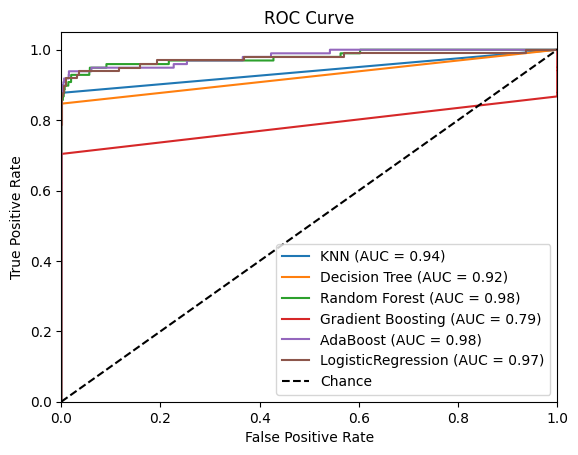

In [59]:
#Dataset completo 

# Specifica il percorso del file CSV contenente il dataset
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'

# Legge il file CSV e crea il dataframe "dataset"
dataset = pd.read_csv(csv_path)

# Crea una copia del dataframe per lavorarci senza alterare il dataframe originale
data = dataset.copy()

# Inizializza un oggetto RobustScaler per scalare le colonne "Amount" e "Time"
rob_scaler = RobustScaler()

# Scalatura delle colonne "Amount" e "Time" e creazione di nuove colonne scalate
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Rimuove le colonne originali "Time" e "Amount" dal dataframe
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Estrae le colonne scalate "scaled_amount" e "scaled_time" in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuove le colonne scalate "scaled_amount" e "scaled_time" dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisce nuovamente le colonne scalate all'inizio del dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrae le features (variabili indipendenti) dal dataframe escludendo la colonna "Class"
X = data.drop(["Class"], axis=1).values
# Estrae le etichette di classe dalla colonna "Class" del dataframe
y = data["Class"].values

# Divide i dati in set di addestramento e di test usando train_test_split
Original_X_train, Original_X_test, Original_y_train, Original_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza i modelli di classificazione e memorizza i nomi dei modelli
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance')
dtc = DecisionTreeClassifier(max_depth= 5, min_samples_split= 5)
rfc = RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
gbc = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 200)
abc = AdaBoostClassifier(algorithm ='SAMME.R', learning_rate= 0.5, n_estimators= 200)
lgm = LogisticRegression()
models = [knn, dtc, rfc, gbc, abc, lgm]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'LogisticRegression']

# Itera su ciascun modello per addestrarlo e valutarlo
for i, model in enumerate(models):
    # Addestra il modello sul set di addestramento
    model.fit(Original_X_train, Original_y_train)
    
    # Effettua previsioni sul set di test
    Original_y_pred = model.predict(Original_X_test)
    
    # Stampa il report di classificazione per valutare le prestazioni del modello
    print(type(model).__name__, "Classification_report:\n", classification_report(Original_y_test, Original_y_pred))
    
    # Calcola le previsioni delle probabilità per la curva ROC
    y_pred_prob = model.predict_proba(Original_X_test)[:, 1]
    
    # Calcola i valori per la curva ROC
    fpr, tpr, _ = roc_curve(Original_y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcola le metriche desiderate
    y_pred_train = model.predict(Original_X_train)
    precision = precision_score(Original_y_test, Original_y_pred)
    recall = recall_score(Original_y_test, Original_y_pred)
    f1 = f1_score(Original_y_test, Original_y_pred)
    accuracy = accuracy_score(Original_y_test, Original_y_pred)
    accuracy_train = accuracy_score(Original_y_train, y_pred_train)
    
    # Crea e visualizza una tabella delle metriche con gradienti di colore
    metrics_table = pd.DataFrame({ 'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza Test', 'Accuratezza Train'],
        'Valore': [precision, recall, f1, accuracy, accuracy_train]
    })

    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    display(metrics_table_styled)

    # Disegna la curva ROC per il modello corrente
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico ROC
plt.show()

GaussianNB Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



,Metrica,Valore
0,Precision,0.060377
1,Recall,0.816327
2,F1 Score,0.112439
3,Accuratezza Test,0.977827
4,Accuratezza Train,0.978468


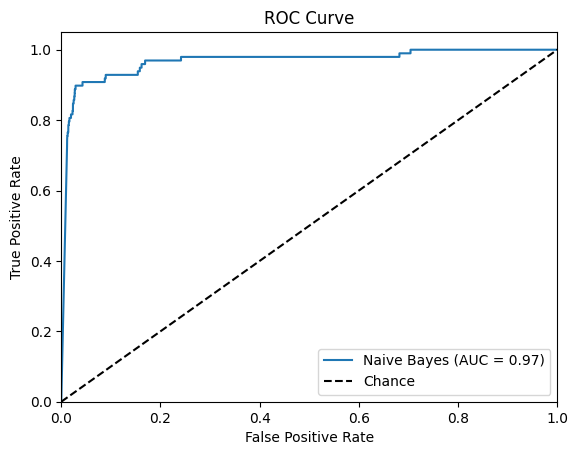

In [46]:
#Dataset completo 

# Specifica il percorso del file CSV contenente il dataset
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'

# Legge il file CSV e crea il dataframe "dataset"
dataset = pd.read_csv(csv_path)

# Crea una copia del dataframe per lavorarci senza alterare il dataframe originale
data = dataset.copy()

# Inizializza un oggetto RobustScaler per scalare le colonne "Amount" e "Time"
rob_scaler = RobustScaler()

# Scalatura delle colonne "Amount" e "Time" e creazione di nuove colonne scalate
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Rimuove le colonne originali "Time" e "Amount" dal dataframe
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Estrae le colonne scalate "scaled_amount" e "scaled_time" in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuove le colonne scalate "scaled_amount" e "scaled_time" dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisce nuovamente le colonne scalate all'inizio del dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrae le features (variabili indipendenti) dal dataframe escludendo la colonna "Class"
X = data.drop(["Class"], axis=1).values
# Estrae le etichette di classe dalla colonna "Class" del dataframe
y = data["Class"].values

# Divide i dati in set di addestramento e di test usando train_test_split
Original_X_train, Original_X_test, Original_y_train, Original_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un oggetto del classificatore Naive Bayes (ad esempio, Gaussian Naive Bayes)
clf = GaussianNB()

clf_names='Naive Bayes'

# Addestra il modello sui dati di addestramento
clf.fit(Original_X_train, Original_y_train)

# Effettua previsioni sul set di test
Original_y_pred = clf.predict(Original_X_test)

#Stampa il report di classificazione per valutare le prestazioni del modello
print(type(clf).__name__, "Classification_report:\n", classification_report(Original_y_test, Original_y_pred))

# Calcola le previsioni delle probabilità per la curva ROC
y_pred_prob = clf.predict_proba(Original_X_test)[:, 1]
    
# Calcola i valori per la curva ROC
fpr, tpr, _ = roc_curve(Original_y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calcola le metriche desiderate
y_pred_train = clf.predict(Original_X_train)
precision = precision_score(Original_y_test, Original_y_pred)
recall = recall_score(Original_y_test, Original_y_pred)
f1 = f1_score(Original_y_test, Original_y_pred)
accuracy = accuracy_score(Original_y_test, Original_y_pred)
accuracy_train = accuracy_score(Original_y_train, y_pred_train)
    
# Crea e visualizza una tabella delle metriche con gradienti di colore
metrics_table = pd.DataFrame({ 'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza Test', 'Accuratezza Train'],
    'Valore': [precision, recall, f1, accuracy, accuracy_train]
})

metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
display(metrics_table_styled)

# Disegna la curva ROC per il modello corrente
plt.plot(fpr, tpr, label=f'{clf_names} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico ROC
plt.show()

GaussianNB Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       110
           1       0.94      0.83      0.88        87

    accuracy                           0.90       197
   macro avg       0.91      0.89      0.90       197
weighted avg       0.90      0.90      0.90       197



,Metrica,Valore
0,Precision,0.935065
1,Recall,0.827586
2,F1 Score,0.878049
3,Accuratezza Test,0.898477
4,Accuratezza Train,0.960610


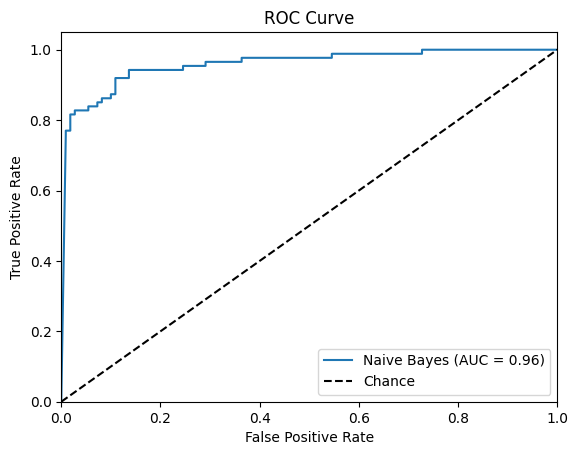

In [49]:
#Subsample

# Specifica il percorso del file CSV contenente il dataset
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'

# Legge il file CSV e crea il dataframe "dataset"
dataset = pd.read_csv(csv_path)

# Crea una copia del dataframe per lavorarci senza alterare il dataframe originale
data = dataset.copy()

# Inizializza un oggetto RobustScaler per scalare le colonne "Amount" e "Time"
rob_scaler = RobustScaler()

# Scalatura delle colonne "Amount" e "Time" e creazione di nuove colonne scalate
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Rimuove le colonne originali "Time" e "Amount" dal dataframe
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Estrae le colonne scalate "scaled_amount" e "scaled_time" in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuove le colonne scalate "scaled_amount" e "scaled_time" dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisce nuovamente le colonne scalate all'inizio del dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Divide le transazioni in legittime e fraudolente
legitimate_transactions = data[data['Class'] == 0]
fraudulent_transactions = data[data['Class'] == 1]

# Sottocampiona il numero di transazioni legittime per farlo corrispondere al numero di transazioni fraudolente
legitimate_subsample = resample(legitimate_transactions, replace=False, n_samples=len(fraudulent_transactions), random_state=42)

# Combina le transazioni legittime sottocampionate con quelle fraudolente
balanced_subsample = pd.concat([legitimate_subsample, fraudulent_transactions])

# Mischia il sottocampionamento 
balanced_subsample = balanced_subsample.sample(frac=1, random_state=42)

# Divide le features (X) dalla variabile target (y)
X = balanced_subsample.drop('Class', axis=1)  # Features
y = balanced_subsample['Class']  # Target

# Divide i dati in set di addestramento e di test usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converte il DataFrame delle feature del set di test e addestramento in un array 
X_test_array = X_test.values 
X_train_array = X_train.values

# Crea un oggetto del classificatore Naive Bayes (ad esempio, Gaussian Naive Bayes)
clf = GaussianNB()

clf_names='Naive Bayes'

# Addestra il modello sui dati di addestramento
clf.fit(X_train, y_train)

# Effettua previsioni sul set di test
y_pred = clf.predict(X_test_array)

#Stampa il report di classificazione per valutare le prestazioni del modello
print(type(clf).__name__, "Classification_report:\n", classification_report(y_test, y_pred))

# Calcola le previsioni delle probabilità per la curva ROC
y_pred_prob = clf.predict_proba(X_test_array)[:, 1]
    
# Calcola i valori per la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calcola le metriche desiderate
y_pred_train = model.predict(X_train_array )
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
    
# Crea e visualizza una tabella delle metriche con gradienti di colore
metrics_table = pd.DataFrame({ 'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza Test', 'Accuratezza Train'],
    'Valore': [precision, recall, f1, accuracy, accuracy_train]
})

metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
display(metrics_table_styled)

# Disegna la curva ROC per il modello corrente
plt.plot(fpr, tpr, label=f'{clf_names} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico ROC
plt.show()

e - Cross-Validation AUC: 0.96


,Metrica,Valore
0,Precision,0.061812
1,Recall,0.829252
2,F1 Score,0.115038
3,Accuratezza,0.977918


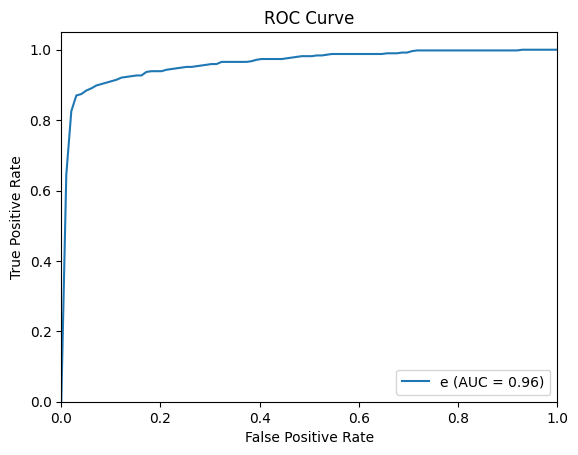

In [50]:
#5 fold Cross Validation

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrae le features (variabili indipendenti) dal dataframe escludendo la colonna "Class"
X = data.drop(["Class"], axis=1).values
# Estrae le etichette di classe dalla colonna "Class" del dataframe
y = data["Class"].values

# Crea un oggetto del classificatore Naive Bayes (ad esempio, Gaussian Naive Bayes)
model = GaussianNB()

model_names='Naive Bayes'


# Definisci il numero di fold per la cross-validation
n_splits = 5
# Crea un oggetto StratifiedKFold per la cross-validation
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inizializza array per memorizzare i tassi di vero positivo (tpr) per ogni valore di fpr
mean_fpr = np.linspace(0, 1, 100)

# Inizializza liste per memorizzare le curve ROC per ciascun modello
tprs = []
aucs = []

# Inizializza le liste per memorizzare le metriche per ciascun modello
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []


# Inizializza le liste per memorizzare i tassi di vero positivo (tpr) per ogni fold
fold_tprs = []
    
# Inizializza la variabile per memorizzare l'area sotto la curva ROC (AUC) per ogni fold
fold_aucs = []

# Inizializza liste per memorizzare le metriche per ciascun fold della cross-validation
fold_precisions = []
fold_recalls = []
fold_f1s = []
fold_accuracies = []
    
# Itera su ciascun fold della cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Addestra il modello sul set di addestramento del fold corrente
    model.fit(X_train, y_train)
        
    # Effettua previsioni sul set di test del fold corrente
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Effettua previsioni sul set di test
    y_pred = model.predict(X_test)
        
    # Calcola la curva ROC per il fold corrente
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        
    # Calcola l'area sotto la curva ROC (AUC) per il fold corrente
    roc_auc = auc(fpr, tpr)
        
    # Aggiungi il tpr e l'AUC del fold corrente alle rispettive liste
    fold_tprs.append(np.interp(mean_fpr, fpr, tpr))
    fold_aucs.append(roc_auc)

    # Calcola le metriche per il fold corrente
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Aggiungi le metriche del fold corrente alle rispettive liste
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)
    fold_accuracies.append(accuracy)
    
# Calcola la media dei tpr per tutti i fold
mean_tpr = np.mean(fold_tprs, axis=0)
    
# Calcola la media delle AUC per tutti i fold
mean_auc = np.mean(fold_aucs)

# Calcola la media delle metriche per tutti i fold
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1 = np.mean(fold_f1s)
mean_accuracy = np.mean(fold_accuracies)
    
# Aggiungi il tpr e l'AUC medi alle rispettive liste
tprs.append(mean_tpr)
aucs.append(mean_auc)

# Aggiungi le medie delle metriche alle rispettive liste
precision_scores.append(mean_precision)
recall_scores.append(mean_recall)
f1_scores.append(mean_f1)
accuracy_scores.append(mean_accuracy)
    
# Stampa l'AUC media della cross-validation per il modello corrente
print(f'{model_names[i]} - Cross-Validation AUC: {mean_auc:.2f}')

# Disegna la curva ROC per il modello corrente
plt.plot(mean_fpr, mean_tpr, label=f'{model_names[i]} (AUC = {mean_auc:.2f})')
    
# Crea una piccola tabella colorata con le metriche
metrics_table = pd.DataFrame({
    'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza'],
    'Valore': [mean_precision, mean_recall, mean_f1, mean_accuracy]
})
    
# Colora le celle della tabella in base ai valori delle metriche
metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
# Visualizza la tabella
display(metrics_table_styled)
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()